<a href="https://colab.research.google.com/github/AdithGH762/Fundamentals-of-ML/blob/main/FML_Lab1adith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([52, 55, 61, 70, 82])
#model 1
linear_model = LinearRegression()
linear_model.fit(X, y)

beta_0 = linear_model.intercept_
beta_1 = linear_model.coef_[0]

print("Model A (Linear Regression):")
print(f"Equation: y = {beta_0:.2f} + {beta_1:.2f}x")

# Prediction for x = 6
x_test = np.array([[6]])
y_pred_linear = linear_model.predict(x_test)[0]
print(f"Prediction at x = 6: {y_pred_linear:.2f}")

# Training MSE
y_train_pred_linear = linear_model.predict(X)
mse_linear = mean_squared_error(y, y_train_pred_linear)
print(f"Training MSE: {mse_linear:.2f}\n")

# Model B
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

coefficients = poly_model.coef_
intercept = poly_model.intercept_

print("Model B (Polynomial Regression - Degree 4):")
print("Equation:")
print(f"y = {intercept:.4f} "
      f"+ {coefficients[1]:.4f}x "
      f"+ {coefficients[2]:.4f}x^2 "
      f"+ {coefficients[3]:.4f}x^3 "
      f"+ {coefficients[4]:.4f}x^4")

# Prediction for x = 6
x_test_poly = poly.transform(x_test)
y_pred_poly = poly_model.predict(x_test_poly)[0]
print(f"Prediction at x = 6: {y_pred_poly:.2f}")

# Training MSE
y_train_pred_poly = poly_model.predict(X_poly)
mse_poly = mean_squared_error(y, y_train_pred_poly)
print(f"Training MSE: {mse_poly:.2f}")


Model A (Linear Regression):
Equation: y = 41.50 + 7.50x
Prediction at x = 6: 86.50
Training MSE: 6.30

Model B (Polynomial Regression - Degree 4):
Equation:
y = 52.0000 + -1.5000x + 1.5000x^2 + 0.0000x^3 + -0.0000x^4
Prediction at x = 6: 97.00
Training MSE: 0.00


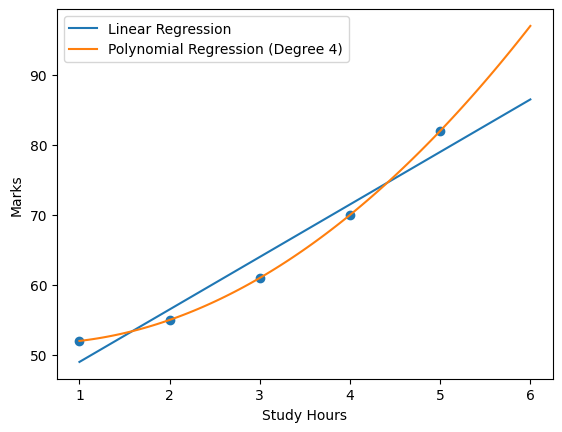

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# -----------------------------
# Dataset
# -----------------------------
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([52, 55, 61, 70, 82])

# -----------------------------
# Model A: Linear Regression
# -----------------------------
linear_model = LinearRegression()
linear_model.fit(X, y)

# -----------------------------
# Model B: Polynomial Regression (Degree 4)
# -----------------------------
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# -----------------------------
# Generate values for plotting
# -----------------------------
X_plot = np.linspace(1, 6, 100).reshape(-1, 1)

y_linear_plot = linear_model.predict(X_plot)
y_poly_plot = poly_model.predict(poly.transform(X_plot))

# -----------------------------
# Plot both models
# -----------------------------
plt.figure()
plt.scatter(X, y)
plt.plot(X_plot, y_linear_plot, label="Linear Regression")
plt.plot(X_plot, y_poly_plot, label="Polynomial Regression (Degree 4)")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# -------------------------------
# Generate nonlinear data
# -------------------------------
np.random.seed(42)
X = np.linspace(1, 8, 30).reshape(-1, 1)
y = 50 + 4*X.flatten() + 5*np.sin(X.flatten()) + np.random.normal(0, 2, 30)

# -------------------------------
# SVR model (SMO internally)
# -------------------------------
svr = SVR(kernel='rbf', C=100, gamma=0.2, epsilon=0.1)

# -------------------------------
# Plot setup
# -------------------------------
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim(1, 8)
ax.set_ylim(min(y)-5, max(y)+5)
ax.set_xlabel("Study Hours")
ax.set_ylabel("Marks")

scatter = ax.scatter([], [], s=40)
line, = ax.plot([], [], linewidth=2)

# -------------------------------
# Update function
# -------------------------------
def update(frame):
    X_train = X[:frame+2]
    y_train = y[:frame+2]

    svr.fit(X_train, y_train)

    X_plot = np.linspace(1, 8, 200).reshape(-1, 1)
    y_pred = svr.predict(X_plot)

    scatter.set_offsets(np.c_[X_train.flatten(), y_train])
    line.set_data(X_plot.flatten(), y_pred)

    ax.set_title(f"SVM Regression (SMO) | Points = {frame+2}")
    return scatter, line

# -------------------------------
# Animation
# -------------------------------
ani = FuncAnimation(fig, update, frames=len(X)-2, interval=300)

plt.close(fig)

# -------------------------------
# IMPORTANT: Display animation
# -------------------------------
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ---------------------------------------
# Generate 2D classification data
# ---------------------------------------
np.random.seed(0)

X1 = np.random.randn(40, 2) + np.array([-2, -2])
X2 = np.random.randn(40, 2) + np.array([2, 2])

X = np.vstack((X1, X2))
y = np.array([0]*40 + [1]*40)

# ---------------------------------------
# SVM model (SMO internally)
# ---------------------------------------
svm = SVC(kernel='linear', C=1.0)

# ---------------------------------------
# Meshgrid for decision boundary
# ---------------------------------------
xx, yy = np.meshgrid(
    np.linspace(-6, 6, 200),
    np.linspace(-6, 6, 200)
)

# ---------------------------------------
# Plot setup
# ---------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

# ---------------------------------------
# Animation update
# ---------------------------------------
def update(frame):
    ax.clear()

    # Always include both classes (VERY IMPORTANT)
    n = frame + 5
    X_train = np.vstack((X1[:n], X2[:n]))
    y_train = np.array([0]*n + [1]*n)

    svm.fit(X_train, y_train)

    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Decision boundary and margins
    ax.contour(xx, yy, Z, levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])

    # Plot all points
    ax.scatter(X1[:, 0], X1[:, 1], color='blue', alpha=0.6, label='Class 0')
    ax.scatter(X2[:, 0], X2[:, 1], color='red', alpha=0.6, label='Class 1')

    # Highlight support vectors
    ax.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=200,
        facecolors='none',
        edgecolors='black',
        linewidths=2,
        label='Support Vectors'
    )

    ax.set_title(f"SVM Classification (SMO) | Points per class = {n}")
    ax.legend(loc="upper left")

# ---------------------------------------
# Create animation
# ---------------------------------------
ani = FuncAnimation(
    fig,
    update,
    frames=30,
    interval=300
)

plt.close(fig)

# ---------------------------------------
# Display animation in Colab
# ---------------------------------------
HTML(ani.to_html5_video())
